# MedCab Data Science Unit 4

## Initial Data Exploration

### Looking at the raw .csv file

In [1]:
# Import potentially required libraries:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=3, suppress=True)

import warnings
warnings.simplefilter("ignore")

from IPython.display import Image

In [2]:
# Import data:

df = pd.read_csv('cannabis.csv')
df.head()

Strain    Type  Rating                                     Effects  \
0          100-Og  hybrid     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow  hybrid     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024  sativa     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs  hybrid     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold  hybrid     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   

                                         Description  
0  $100 OG is a 50/50 hybrid strain that packs a ...  
1  The ‘98 Aloha White Widow is an especially pot...  
2  1024 is a sativa-dominant hybrid bred in Spain...  
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...  
4  Also known as Kosher Tangie, 24k Gold is a 60%...

In [3]:
# Looking at the dataset's information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Strain       2351 non-null   object 
 1   Type         2351 non-null   object 
 2   Rating       2351 non-null   float64
 3   Effects      2351 non-null   object 
 4   Flavor       2305 non-null   object 
 5   Description  2318 non-null   object 
dtypes: float64(1), object(5)
memory usage: 110.3+ KB


In [4]:
# Looking for null values:

df.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [5]:
# Checking for unique strains:

df['Strain'].nunique()

2350

In [6]:
# Checking for unique types:

df['Type'].nunique()

3

hybrid    1212
indica     699
sativa     440
Name: Type, dtype: int64


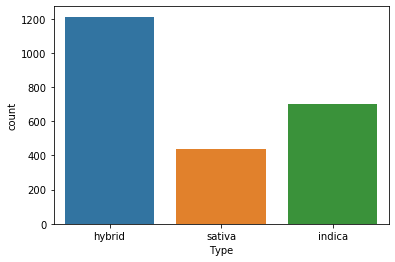

In [7]:
# Chart showing the value counts of each type:

print(df.Type.value_counts())
sns.categorical.countplot(df.Type);

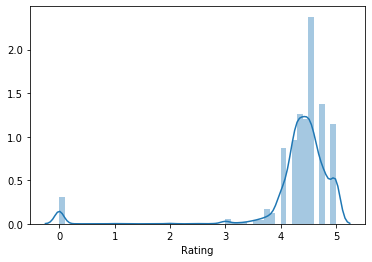

In [8]:
# Distribution plot for ratings by strain:

sns.distplot(df.Rating);

In [9]:
df.groupby(["Type"])["Rating"].max()

Type
hybrid    5.0
indica    5.0
sativa    5.0
Name: Rating, dtype: float64

In [10]:
df.groupby(["Type"])["Rating"].min()

Type
hybrid    0.0
indica    0.0
sativa    0.0
Name: Rating, dtype: float64

In [11]:
df.groupby(["Type"])["Rating"].mean()

Type
hybrid    4.291667
indica    4.347783
sativa    4.303864
Name: Rating, dtype: float64

In [12]:
# Making df's for effects and flavors:

effects = pd.DataFrame(df.Effects.str.split(',', 4).tolist(),
             columns = ['Effect_one','Effect_two','Effect_three','Effect_four','Effect_five'])

flavors = pd.DataFrame(df.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_one','Flavor_two','Flavor_three'])

In [13]:
# Looking at the effects df:

effects

Effect_one Effect_two Effect_three Effect_four Effect_five
0      Creative  Energetic       Tingly    Euphoric     Relaxed
1       Relaxed    Aroused     Creative       Happy   Energetic
2      Uplifted      Happy      Relaxed   Energetic    Creative
3        Tingly   Creative       Hungry     Relaxed    Uplifted
4         Happy    Relaxed     Euphoric    Uplifted   Talkative
...         ...        ...          ...         ...         ...
2346      Happy   Uplifted      Relaxed    Euphoric   Energetic
2347    Relaxed      Happy     Euphoric    Uplifted      Sleepy
2348    Relaxed     Sleepy    Talkative    Euphoric       Happy
2349    Relaxed     Sleepy     Euphoric       Happy      Hungry
2350     Hungry    Relaxed     Uplifted       Happy      Sleepy

[2351 rows x 5 columns]

In [14]:
# Looking at the flavors df:

flavors

Flavor_one Flavor_two  Flavor_three
0           Earthy      Sweet        Citrus
1          Flowery     Violet        Diesel
2     Spicy/Herbal       Sage         Woody
3          Apricot     Citrus    Grapefruit
4           Citrus     Earthy        Orange
...            ...        ...           ...
2346        Earthy      Woody          Pine
2347         Sweet      Berry         Grape
2348        Earthy      Sweet  Spicy/Herbal
2349         Sweet     Earthy       Pungent
2350         Berry     Earthy       Pungent

[2351 rows x 3 columns]

In [15]:
# Making new df with effects and flavor separated:

EF_df = pd.concat([df, flavors], axis=1)

In [16]:
EF_df = pd.concat([EF_df, effects], axis=1)

In [17]:
# Looking at new dataframe:

EF_df

Strain    Type  Rating  \
0             100-Og  hybrid     4.0   
1     98-White-Widow  hybrid     4.7   
2               1024  sativa     4.4   
3           13-Dawgs  hybrid     4.2   
4           24K-Gold  hybrid     4.6   
...              ...     ...     ...   
2346         Zeus-Og  hybrid     4.7   
2347        Zkittlez  indica     4.6   
2348     Zombie-Kush  indica     5.0   
2349       Zombie-Og  indica     4.4   
2350        Zoom-Pie  indica     4.6   

                                         Effects                     Flavor  \
0     Creative,Energetic,Tingly,Euphoric,Relaxed        Earthy,Sweet,Citrus   
1       Relaxed,Aroused,Creative,Happy,Energetic      Flowery,Violet,Diesel   
2      Uplifted,Happy,Relaxed,Energetic,Creative    Spicy/Herbal,Sage,Woody   
3        Tingly,Creative,Hungry,Relaxed,Uplifted  Apricot,Citrus,Grapefruit   
4      Happy,Relaxed,Euphoric,Uplifted,Talkative       Citrus,Earthy,Orange   
...                                          ...                        ...   
2346   Happy,Uplifted,Relaxed,Euphoric,Energetic          Earthy,Woody,Pine   
2347      Relaxed,Happy,Euphoric,Uplifted,Sleepy          Sweet,Berry,Grape   
2348     Relaxed,Sleepy,Talkative,Euphoric,Happy  Earthy,Sweet,Spicy/Herbal   
2349        Relaxed,Sleepy,Euphoric,Happy,Hungry       Sweet,Earthy,Pungent   
2350        Hungry,Relaxed,Uplifted,Happy,Sleepy       Berry,Earthy,Pungent   

                                            Description    Flavor_one  \
0     $100 OG is a 50/50 hybrid strain that packs a ...        Earthy   
1     The ‘98 Aloha White Widow is an especially pot...       Flowery   
2     1024 is a sativa-dominant hybrid bred in Spain...  Spicy/Herbal   
3     13 Dawgs is a hybrid of G13 and Chemdawg genet...       Apricot   
4     Also known as Kosher Tangie, 24k Gold is a 60%...        Citrus   
...                                                 ...           ...   
2346  Zeus OG is a hybrid cross between Pineapple OG...        Earthy   
2347  Zkittlez is an indica-dominant mix of Grape Ap...         Sweet   
2348  Zombie Kush by Ripper Seeds comes from two dif...        Earthy   
2349  If you’re looking to transform into a flesh-ea...         Sweet   
2350  Zoom Pie (also known as Zombie Pie) is a heavy...         Berry   

     Flavor_two  Flavor_three Effect_one Effect_two Effect_three Effect_four  \
0         Sweet        Citrus   Creative  Energetic       Tingly    Euphoric   
1        Violet        Diesel    Relaxed    Aroused     Creative       Happy   
2          Sage         Woody   Uplifted      Happy      Relaxed   Energetic   
3        Citrus    Grapefruit     Tingly   Creative       Hungry     Relaxed   
4        Earthy        Orange      Happy    Relaxed     Euphoric    Uplifted   
...         ...           ...        ...        ...          ...         ...   
2346      Woody          Pine      Happy   Uplifted      Relaxed    Euphoric   
2347      Berry         Grape    Relaxed      Happy     Euphoric    Uplifted   
2348      Sweet  Spicy/Herbal    Relaxed     Sleepy    Talkative    Euphoric   
2349     Earthy       Pungent    Relaxed     Sleepy     Euphoric       Happy   
2350     Earthy       Pungent     Hungry    Relaxed     Uplifted       Happy   

     Effect_five  
0        Relaxed  
1      Energetic  
2       Creative  
3       Uplifted  
4      Talkative  
...          ...  
2346   Energetic  
2347      Sleepy  
2348       Happy  
2349      Hungry  
2350      Sleepy  

[2351 rows x 14 columns]

In [18]:
# List of columns in new df:

EF_df.columns

Index(['Strain', 'Type', 'Rating', 'Effects', 'Flavor', 'Description',
       'Flavor_one', 'Flavor_two', 'Flavor_three', 'Effect_one', 'Effect_two',
       'Effect_three', 'Effect_four', 'Effect_five'],
      dtype='object')

### Reviewing Cannabis and Kushy datasets

In [19]:
# Import the datasets via URL:

cannabis_csv_url = 'https://raw.githubusercontent.com/med-cabinet-5/data-science/master/data/cannabis.csv'
kushy_strains_csv_url = 'https://raw.githubusercontent.com/kushyapp/cannabis-dataset/master/Dataset/Strains/strains-kushy_api.2017-11-14.csv'

In [20]:
# Turn them into a dataframe:

cannabis = pd.read_csv(cannabis_csv_url)
kushy = pd.read_csv(kushy_strains_csv_url)

In [21]:
# Looking at Cannabis:

cannabis.head(5)

Strain    Type  Rating                                     Effects  \
0          100-Og  hybrid     4.0  Creative,Energetic,Tingly,Euphoric,Relaxed   
1  98-White-Widow  hybrid     4.7    Relaxed,Aroused,Creative,Happy,Energetic   
2            1024  sativa     4.4   Uplifted,Happy,Relaxed,Energetic,Creative   
3        13-Dawgs  hybrid     4.2     Tingly,Creative,Hungry,Relaxed,Uplifted   
4        24K-Gold  hybrid     4.6   Happy,Relaxed,Euphoric,Uplifted,Talkative   

                      Flavor  \
0        Earthy,Sweet,Citrus   
1      Flowery,Violet,Diesel   
2    Spicy/Herbal,Sage,Woody   
3  Apricot,Citrus,Grapefruit   
4       Citrus,Earthy,Orange   

                                         Description  
0  $100 OG is a 50/50 hybrid strain that packs a ...  
1  The ‘98 Aloha White Widow is an especially pot...  
2  1024 is a sativa-dominant hybrid bred in Spain...  
3  13 Dawgs is a hybrid of G13 and Chemdawg genet...  
4  Also known as Kosher Tangie, 24k Gold is a 60%...

In [22]:
# Looking at Kushy:

kushy.head(5)

id  status  sort               name  slug  image  \
0   1       1     0             100 OG   NaN    NaN   
1   2       1     0       707 Headband   NaN    NaN   
2   3       1     0               A-10   NaN    NaN   
3   4       1     0      Acapulco Gold   NaN    NaN   
4   5       1     0  Afghani Bullrider   NaN    NaN   

                                         description    type  crosses  \
0  <p>This strain is named after it's high price ...  Hybrid      NaN   
1                                                NaN  Hybrid  378,272   
2                                                NaN  Indica        0   
3                                                NaN  Sativa        0   
4                                                NaN  Hybrid        0   

                            breeder  ... cbn  cbg cbgm cbgv  cbc  cbcv  cbv  \
0  Old School Breeder's Association  ...  10  0.0  0.0  0.0  0.0   0.0  0.0   
1                   Unknown Breeder  ...   0  NaN  NaN  NaN  NaN   NaN  NaN   
2                               NaN  ...   0  NaN  NaN  NaN  NaN   NaN  NaN   
3                               NaN  ...   0  NaN  NaN  NaN  NaN   NaN  NaN   
4                   Unknown Breeder  ...   0  NaN  NaN  NaN  NaN   NaN  NaN   

   cbe  cbt  cbl  
0  0.0  0.0  0.0  
1  NaN  NaN  NaN  
2  NaN  NaN  NaN  
3  NaN  NaN  NaN  
4  NaN  NaN  NaN  

[5 rows x 31 columns]

In [23]:
# Looking for NaN in kushy:

kushy.isnull().sum()

id                0
status            0
sort              0
name              1
slug           9524
image          9524
description    9523
type             24
crosses        8960
breeder         545
effects        8509
ailment        8553
flavor         8553
location       8903
terpenes       9523
thc               0
thca            889
thcv            889
cbd               0
cbda            889
cbdv            889
cbn               0
cbg             889
cbgm            889
cbgv            889
cbc             889
cbcv            889
cbv             889
cbe             889
cbt             889
cbl             889
dtype: int64

#### The above information is for chemical analysis and such, (which is not needed), but it provides plenty of ailment observations (which can be used)

In [24]:
# Looking at NaN in Cannabis:

cannabis.isnull().sum()

Strain          0
Type            0
Rating          0
Effects         0
Flavor         46
Description    33
dtype: int64

In [25]:
# Let's drop those NaN values, shall we:

cannabis = cannabis.dropna(subset=['Flavor', 'Description'])

In [26]:
# Name and ailment from kushy seems to be the only data we would want:

kushy_clean = kushy[['name', 'ailment']]

In [27]:
# Looking at NaN in cleaned kushy df:

kushy_clean.isnull().sum()

name          1
ailment    8553
dtype: int64

In [28]:
# Let's drop those NaN values as well:

kushy_clean = kushy_clean.dropna()

In [29]:
# Merge the data of cannabis and kushy:

merged = pd.merge(cannabis, kushy_clean, left_on='Strain', right_on='name', how='left')

In [30]:
# Dropping the rating column so to leave only strings in the df:

merged_strings = merged.drop(['Rating'], axis=1)

In [31]:
# Filling NaN values with '':

merged_strings = merged_strings.fillna('')

In [32]:
# Verifying there are no more NaNs:

merged_strings.isnull().sum()

Strain         0
Type           0
Effects        0
Flavor         0
Description    0
name           0
ailment        0
dtype: int64

In [33]:
# Looking at the data types:

merged_strings.dtypes

Strain         object
Type           object
Effects        object
Flavor         object
Description    object
name           object
ailment        object
dtype: object

In [34]:
# Concatenating all of the text for NLP processing:

merged_strings['all_text'] = merged_strings.apply(lambda x: ' '.join(x), axis=1)

In [35]:
# Looking at a few examples of all_text:

merged_strings['all_text'][1]

'98-White-Widow hybrid Relaxed,Aroused,Creative,Happy,Energetic Flowery,Violet,Diesel The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes, giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank. \xa0  '

In [36]:
merged_strings['all_text'][15]

'818-Og indica Relaxed,Happy,Euphoric,Giggly,Sleepy Earthy,Diesel,Flowery Named after the telephone area code of the San Fernando Valley in Los Angeles, 818 OG is an OG Kush strain popular with patients for treating pain, loss of appetite, and insomnia. Not to be confused with the other OG cut named for the locale, the 818 OG has a very fruity flavor that is quite different from the sour, earthy fuel taste found in the SFV OG.\xa0  '

## NLP Model

In [37]:
# Imports for NLP model:

import spacy
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
# Instantiating the large English library:

nlp = spacy.load("en_core_web_lg")

In [39]:
# Creating a function to tokenize/lemmatize:

def lemmatize(text):
    """
    This function will tokenize the strings, and then returns
    a list of lemmas.
    """
    lemmas = []
    processed = nlp(text)
    
    for token in processed:
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    return ' '.join(lemmas)

In [40]:
# Updating merged_strings with lemmas:

merged_strings['lemmas'] = merged_strings['all_text'].apply(lemmatize)

In [41]:
# Looking at previous examples, but now lemmatized:

merged_strings['lemmas'][1]

'98-white Widow hybrid Relaxed aroused Creative happy Energetic Flowery Violet Diesel 98 Aloha White Widow especially potent cut White Widow grow renown alongside hawaiian legend like Maui Wowie Kona Gold White Widow phenotype reeks diesel skunk rich earthy taste intermittent note hash bud coat trichome give dark foliage lustrous glint room fill odor hitter quitter uplift mind mind bend euphoria materialize body airy relaxation 98 Aloha White Widow available Pua Mana 1st Hawaiian Pakalōlō Seed Bank \xa0  '

In [42]:
merged_strings['lemmas'][15]

'818-Og indica Relaxed happy euphoric giggly Sleepy Earthy Diesel Flowery name telephone area code San Fernando Valley Los Angeles 818 OG OG Kush strain popular patient treat pain loss appetite insomnia confuse OG cut name locale 818 OG fruity flavor different sour earthy fuel taste find SFV OG \xa0  '

In [43]:
# Transforming text to feature vectors with english stop words:

vectorized = TfidfVectorizer(stop_words="english", min_df=0.025, max_df=0.98, ngram_range=(1,3))

In [44]:
# Building document term matrix:

dtm = vectorized.fit_transform(merged_strings['lemmas'])

In [45]:
# Creating a dataframe out of it:

dtm = pd.DataFrame(dtm.todense(), columns=vectorized.get_feature_names()) 

In [46]:
# Looking at dtm:

dtm.head(5)

10  10 week       1st   20        50        60   70   80  active  \
0  0.0      0.0  0.000000  0.0  0.400535  0.000000  0.0  0.0     0.0   
1  0.0      0.0  0.115176  0.0  0.000000  0.000000  0.0  0.0     0.0   
2  0.0      0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0     0.0   
3  0.0      0.0  0.000000  0.0  0.000000  0.000000  0.0  0.0     0.0   
4  0.0      0.0  0.000000  0.0  0.000000  0.172131  0.0  0.0     0.0   

   activity  ...      user  variety  way  week     white  white widow  \
0       0.0  ...  0.200870      0.0  0.0   0.0  0.000000     0.000000   
1       0.0  ...  0.000000      0.0  0.0   0.0  0.414382     0.530228   
2       0.0  ...  0.000000      0.0  0.0   0.0  0.000000     0.000000   
3       0.0  ...  0.000000      0.0  0.0   0.0  0.000000     0.000000   
4       0.0  ...  0.182326      0.0  0.0   0.0  0.000000     0.000000   

      widow  win     woody  yield  
0  0.000000  0.0  0.000000    0.0  
1  0.527328  0.0  0.000000    0.0  
2  0.000000  0.0  0.144146    0.0  
3  0.000000  0.0  0.152048    0.0  
4  0.000000  0.0  0.000000    0.0  

[5 rows x 472 columns]

In [47]:
# Saving processed data as a .csv file for use in model:

dtm.to_csv('cannabis-processed.csv', index=False)

## Predictive Model

In [48]:
# Imports for KNN model:

from sklearn.neighbors import NearestNeighbors

In [49]:
# Creating and fitting model:

model = NearestNeighbors(n_neighbors=3, algorithm='kd_tree')
model.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                 radius=1.0)

In [50]:
# Testing a string with a potential user entry (I am in chemotherapy and need pain relief and to increase my appetite):

test_entry = ['I am in chemotherapy and need pain relief and to increase my appetite']

In [51]:
test_entry = vectorized.transform(test_entry)

In [52]:
test_entry = test_entry.todense()

In [53]:
# Getting predictions:

predictions = model.kneighbors(test_entry)

In [54]:
# Looking at the predictions:

predictions

(array([[1.091, 1.175, 1.189]]), array([[1622, 1128, 1163]], dtype=int64))

In [55]:
# Best match:

predictions[1][0][0]

1622

In [56]:
best_match = predictions[1][0][0]

In [57]:
merged_strings.iloc[best_match]

Strain                                              Purple-Arrow
Type                                                      hybrid
Effects                 Happy,Uplifted,Focused,Energetic,Relaxed
Flavor                                       Sweet,Citrus,Earthy
Description    When it comes to knocking out pain, no medical...
name                                                            
ailment                                                         
all_text       Purple-Arrow hybrid Happy,Uplifted,Focused,Ene...
lemmas         Purple Arrow hybrid Happy uplifted Focused ene...
Name: 1622, dtype: object

In [58]:
recommended_strain = merged_strings.iloc[best_match]

In [59]:
# Dropping name, ailment, all_text and lemmas from recommended_strain to a dictionary: 

recommended_strain.drop(['name', 'ailment', 'all_text', 'lemmas']).to_dict()

{'Strain': 'Purple-Arrow',
 'Type': 'hybrid',
 'Effects': 'Happy,Uplifted,Focused,Energetic,Relaxed',
 'Flavor': 'Sweet,Citrus,Earthy',
 'Description': 'When it comes to knocking out pain, no medical strain hits the target quite like Purple Arrow. This hybrid provides effective relief for severe pain while simultaneously inducing a sense of uplift and euphoria. Extremely well-rounded, Purple Arrow is potent without causing that over-medicated feeling of some pain relief strains. The uniqueness of this strain is complemented by its earthy aroma. Fragrant, herbal, and a little sweet, this strain tastes almost as good as it feels. When you need immediate relief and would like to stay off the couch, Purple Arrow is a fantastic choice.'}

In [60]:
# Creating variable called returned values:

returned_values = recommended_strain.drop(['name', 'ailment', 'all_text', 'lemmas']).to_dict()

In [61]:
# Looking at returned values:

returned_values

{'Strain': 'Purple-Arrow',
 'Type': 'hybrid',
 'Effects': 'Happy,Uplifted,Focused,Energetic,Relaxed',
 'Flavor': 'Sweet,Citrus,Earthy',
 'Description': 'When it comes to knocking out pain, no medical strain hits the target quite like Purple Arrow. This hybrid provides effective relief for severe pain while simultaneously inducing a sense of uplift and euphoria. Extremely well-rounded, Purple Arrow is potent without causing that over-medicated feeling of some pain relief strains. The uniqueness of this strain is complemented by its earthy aroma. Fragrant, herbal, and a little sweet, this strain tastes almost as good as it feels. When you need immediate relief and would like to stay off the couch, Purple Arrow is a fantastic choice.'}